# IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import math

# READ THE DATASET

In [2]:
data=pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# DATA ANALYSIS

In [5]:
data.shape

(200, 4)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.duplicated().sum()

0

### SCATTER PLOT

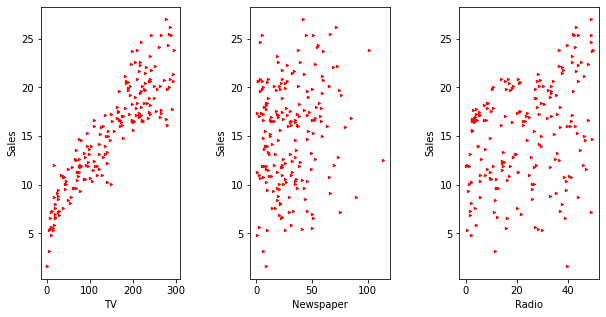

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.5)
plt.scatter(data["TV"],data["Sales"],c="r",marker=">",s=5.5)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.subplot(1,3,2)
plt.subplots_adjust(wspace=0.5)
plt.scatter(data["Newspaper"],data["Sales"],c="r",marker=">",s=5.5)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.5)
plt.scatter(data["Radio"],data["Sales"],c="r",marker=">",s=5.5)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

### HEATMAP

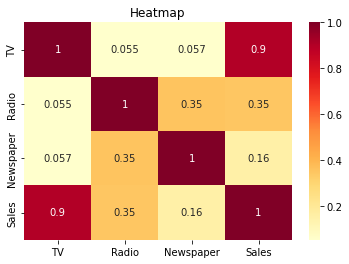

In [20]:
sns.heatmap(data=data.corr(),annot=True,cmap='YlOrRd')
plt.title("Heatmap")
plt.show()

### BOXPLOT

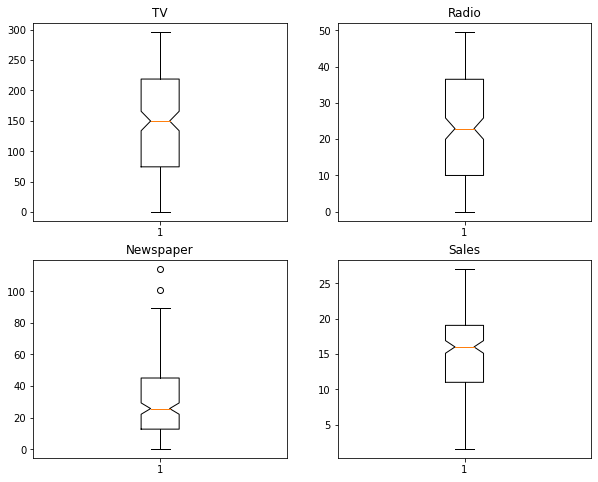

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(x=data["TV"],notch=True)
plt.title("TV")
plt.subplot(2,2,2)
plt.boxplot(x=data["Radio"],notch=True)
plt.title("Radio")
plt.subplot(2,2,3)
plt.boxplot(x=data["Newspaper"],notch=True)
plt.title("Newspaper")
plt.subplot(2,2,4)
plt.boxplot(x=data["Sales"],notch=True)
plt.title("Sales")
plt.show()

# FEATURE ENGINEERING

### MUTUAL INFORMATION GAIN

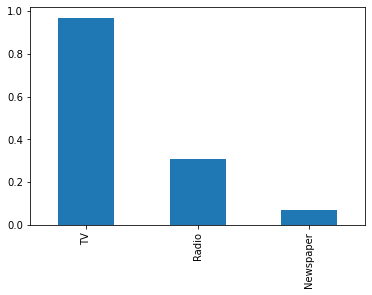

In [22]:
from sklearn.feature_selection import mutual_info_regression
columns1=data[["TV","Radio","Newspaper"]]
columns2=data["Sales"]
mutual_info=mutual_info_regression(columns1,columns2)
mutual_info=pd.Series(mutual_info)
mutual_info.index=columns1.columns
mutual_info.plot.bar()
plt.show()

FROM ABOVE ANALYSIS IT IS CLEAR THAT "TV" IS THE MOST IMPORTANT COLUMN AND HAS VERY STRONG RELATIONSHIP WITH "Sales".
"Radio" HAS SOMEWHAT WEAKER RELATIONSHIP WITH "Sales" BUT IT AFFECTS "Sales".
"Newspaper" CONTAINS OUTLIERS AND HAS WEAK RELATONSHIP WITH "Sales".THEREFORE IT DOES NOT AFFECT "Sales".

# SPLITTING DATA INTO TRAIN AND TEST SETS

In [23]:
features=data.iloc[:,:2]
target=data["Sales"]

In [24]:
features.shape

(200, 2)

In [25]:
target.shape

(200,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=24)

# NORMALISING THE DATASET

In [27]:
sc=StandardScaler()
train_data=sc.fit_transform(x_train)
test_data=sc.transform(x_test)

# MODEL TRAINING

In [28]:
model=LinearRegression()
model.fit(train_data,y_train)

LinearRegression()

In [29]:
tv_coef=round(model.coef_[0],4)
print("TV COEFFICIENT:",tv_coef)
radio_coef=round(model.coef_[1],4)
print("RADIO COEFFICIENT:",radio_coef)
intercept=round(model.intercept_,4)
print("INTERCEPT:",intercept)

TV COEFFICIENT: 4.7219
RADIO COEFFICIENT: 1.5914
INTERCEPT: 15.0957


In [30]:
y_pred=model.predict(test_data)

# CHECKING THE PERFORMANCE

#### ROOT MEAN SQUARED ERROR

In [32]:
mse=round(mean_squared_error(y_test,y_pred),2)
round(math.sqrt(mse),2)

1.47

#### R SQUARED VALUE

In [33]:
r2_value=round(r2_score(y_test,y_pred),2)
r2_value

0.91

# ACTUAL VS PREDICTED SALES

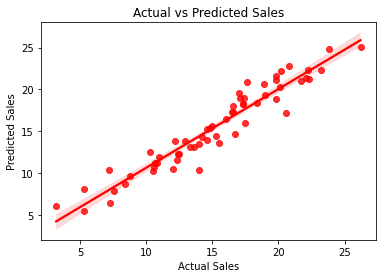

In [34]:
sns.regplot(data=data,x=y_test,y=y_pred,color="red")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()